In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Read csv data file, change to your location
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\Iris.csv")

Đoạn chương trình dưới đây chỉ thực hiện in thông tin hoặc hiển thị dữ liệu để chúng ta có cái nhìn tổng
quan, trực giác

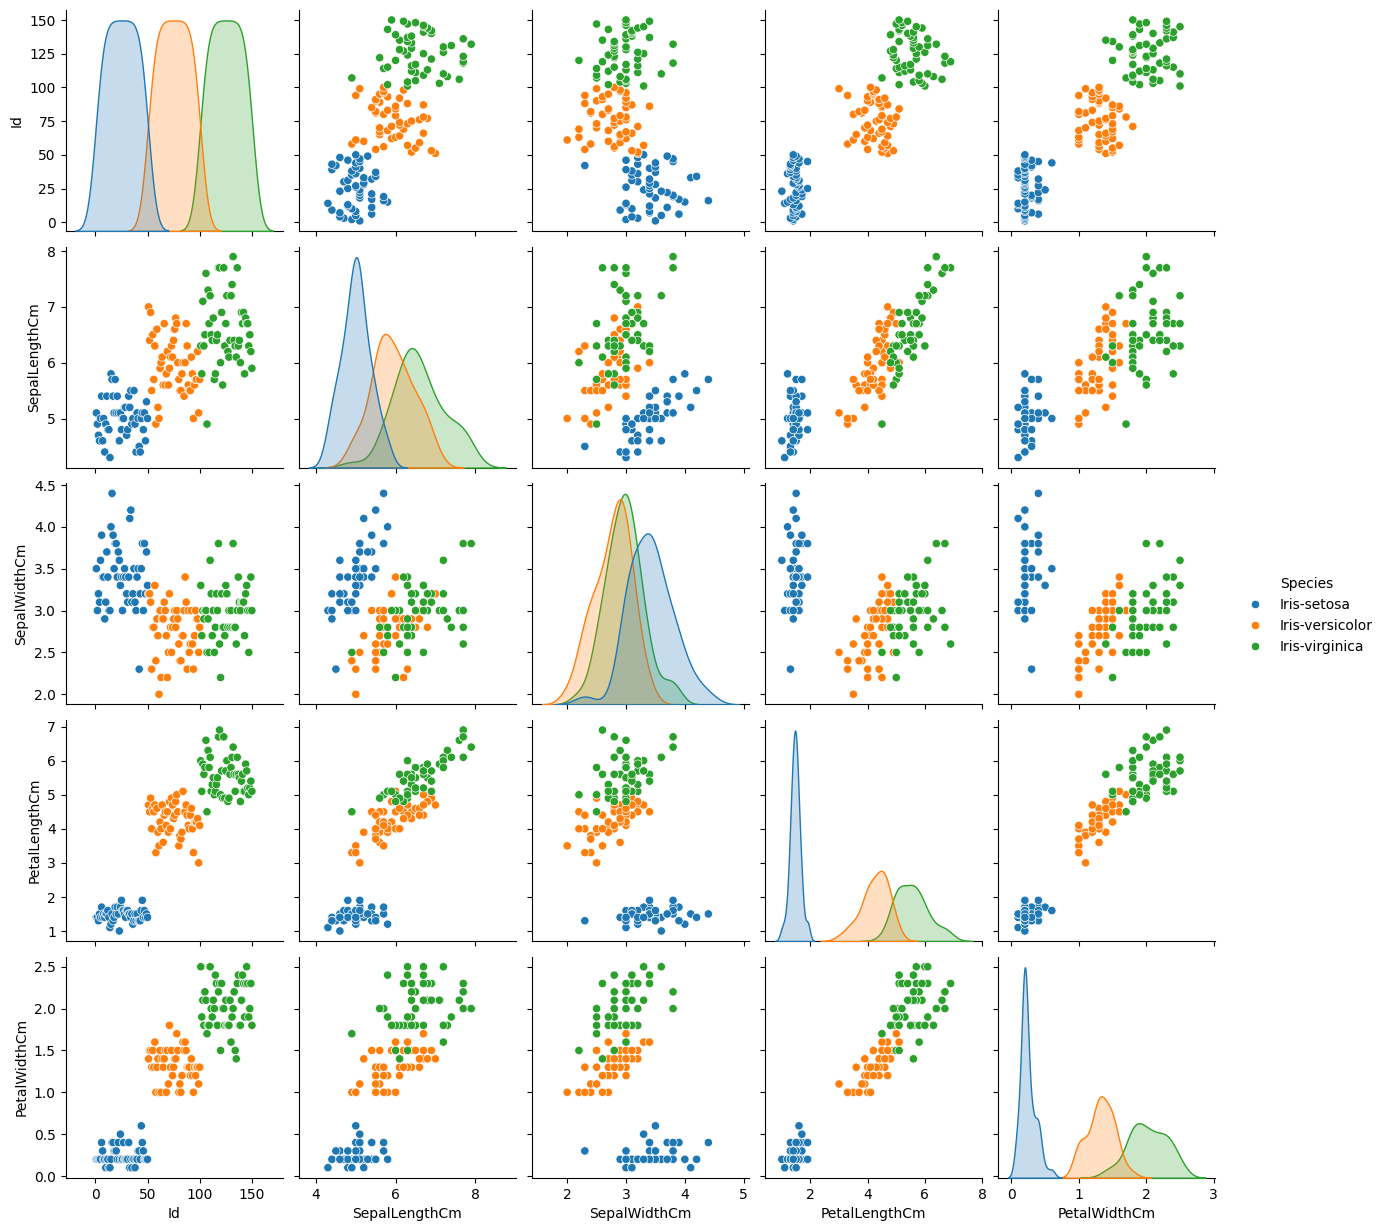

In [4]:
# show data information
df
df.describe()
sns.pairplot(df, hue = 'Species')

Chuẩn hóa và tính ma trận hiệp phương sai của dữ liệu:

Text(0.5, 1.0, 'Correlation matrix')

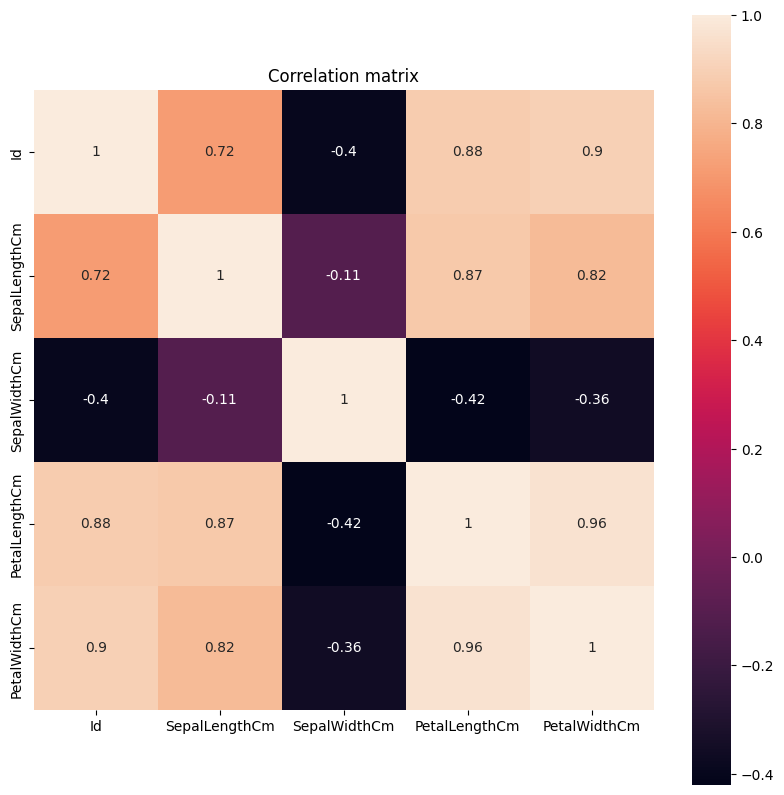

In [5]:
# We're seperating the species column
species = df["Species"].tolist()
X = df.drop("Species", axis=1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

Trong đoạn chương trình dưới đây, chúng ta tính hệ riêng của ma trận hiệp phương sai (X_corr) bằng 
cả 2 công cụ của thư viện Numpy.Linalg là SVD (khai triển kỳ dị) và Eig (Khai triển hệ giá trị-vector 
riêng), sau đó in ra kết quả để so sánh. 

In [6]:
# method1 
u,s,v = np.linalg.svd(X_corr) 
eig_values, eig_vectors = s, u 
print(eig_values, eig_vectors )
 
# method2 
np.linalg.eig(X_corr)

[3.7352665  0.92176284 0.23413122 0.08823837 0.02060107] [[-0.48136016  0.02275157 -0.67406853  0.55978662 -0.0067323 ]
 [-0.44844975 -0.38285827  0.64520569  0.40999945  0.26061932]
 [ 0.23195044 -0.92007839 -0.27427786 -0.09491665 -0.12416613]
 [-0.51079205 -0.03074857  0.13238322 -0.28817343 -0.79848404]
 [-0.5024696  -0.07356757 -0.19127876 -0.65305918  0.52824072]]


EigResult(eigenvalues=array([3.7352665 , 0.92176284, 0.23413122, 0.08823837, 0.02060107]), eigenvectors=array([[-0.48136016, -0.02275157, -0.67406853,  0.55978662, -0.0067323 ],
       [-0.44844975,  0.38285827,  0.64520569,  0.40999945,  0.26061932],
       [ 0.23195044,  0.92007839, -0.27427786, -0.09491665, -0.12416613],
       [-0.51079205,  0.03074857,  0.13238322, -0.28817343, -0.79848404],
       [-0.5024696 ,  0.07356757, -0.19127876, -0.65305918,  0.52824072]]))

Đoạn chương trình dưới đây hiển thị mức độ “quan trọng” của các trường dữ liệu (gồm 04 trường theo 
thứ tự như trong mô tả dữ liệu)

Text(0.5, 0, 'Dimensions')

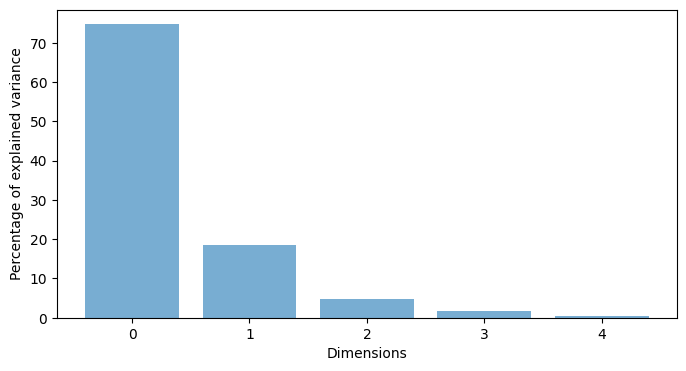

In [7]:
# plotting the variance explained by each PC  
explained_variance=(eig_values / np.sum(eig_values))*100 
plt.figure(figsize=(8,4)) 
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.6) 
plt.ylabel('Percentage of explained variance') 
plt.xlabel('Dimensions') 

Đoạn chương trình chứa thủ tục chiếu dữ liệu (X) xuống không gian con 02 chiều ứng với 2 giá trị riêng 
lớn nhất (tức là trị riêng [0] và trị riêng [1]) 

In [8]:
# calculating our new axis 
pc1 = X.dot(eig_vectors[:,0]) 
pc2 = X.dot(eig_vectors[:,1]) 

Vẽ dữ liệu trong không gian 2 chiều mới thành lập để quan sát: 

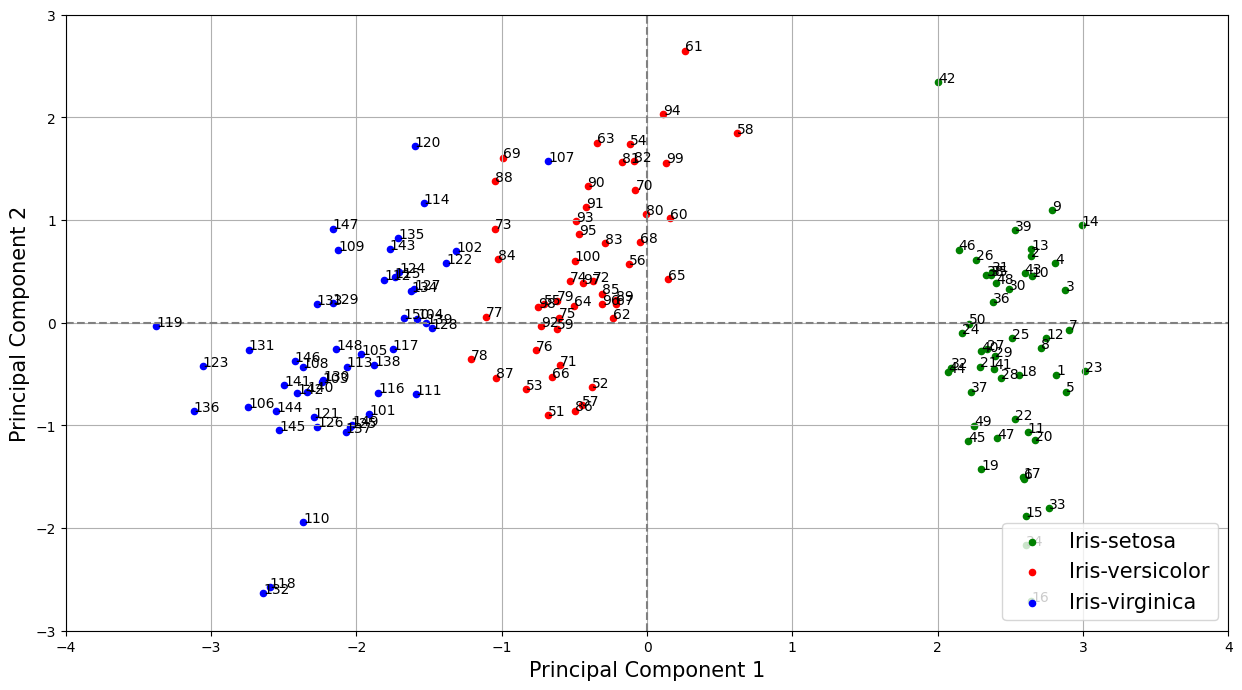

In [9]:
# plotting in 2D 
def plot_scatter(pc1, pc2): 
    fig, ax = plt.subplots(figsize=(15, 8)) 
     
    species_unique = list(set(species)) 
    species_colors = ["r","b","g"] 
     
    for i, spec in enumerate(species): 
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, 
c=species_colors[species_unique.index(spec)]) 
        ax.annotate(str(i+1), (pc1[i],pc2[i])) 
     
    from collections import OrderedDict 
    handles, labels = plt.gca().get_legend_handles_labels() 
    by_label = OrderedDict(zip(labels, handles)) 
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4) 
     
    ax.set_xlabel('Principal Component 1', fontsize = 15) 
    ax.set_ylabel('Principal Component 2', fontsize = 15) 
    ax.axhline(y=0, color="grey", linestyle="--") 
    ax.axvline(x=0, color="grey", linestyle="--") 
     
    plt.grid() 
    plt.axis([-4, 4, -3, 3]) 
    plt.show() 
     
plot_scatter(pc1, pc2) 

Chúng ta có thể sử dụng thư viện sklearn để thực hiện yêu cầu trên. Toàn bộ đoạn lệnh như sau: 

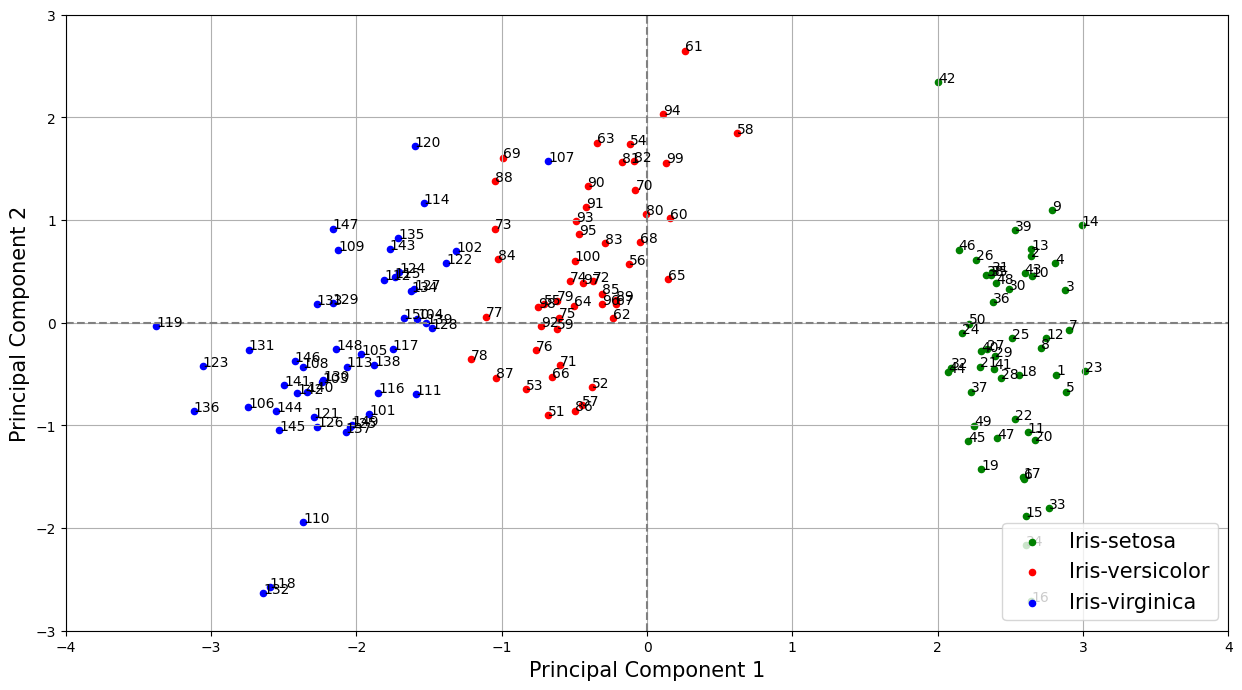

(150, 5)


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
#Read csv data file, change to your location 
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\Iris.csv") 
 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
 
X = df.drop("Species", axis=1) 
X = StandardScaler().fit_transform(X) 
pca = PCA() 
result = pca.fit_transform(X) 
# Remember what we said about the sign of eigen vectors that might change ? 
pc1 = - result[:,0] 
pc2 = - result[:,1] 
plot_scatter(pc1, pc2)

1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau
đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu.

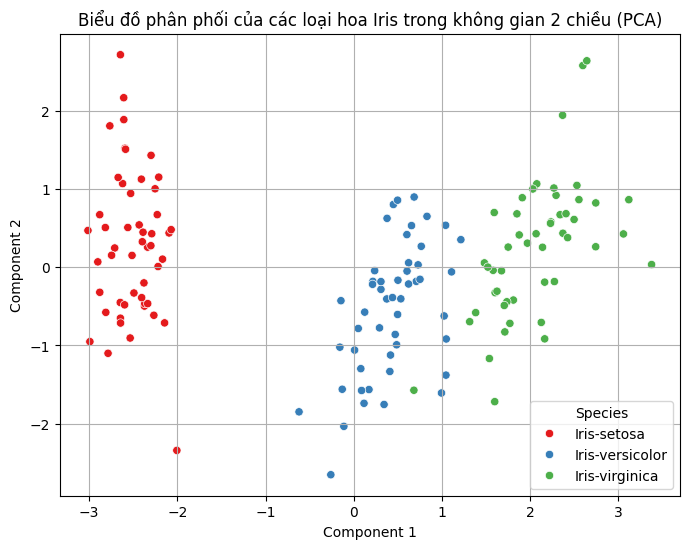

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\Iris.csv")

# Loại bỏ cột 'Species' và chuẩn hóa dữ liệu
X = df.drop("Species", axis=1)
X = StandardScaler().fit_transform(X)

# Áp dụng phân tích thành phần chính (PCA)
pca = PCA(n_components=2)  # Chỉ giữ lại 2 thành phần chính
result = pca.fit_transform(X)

# Lấy hai thành phần chính
pc1 = result[:, 0]
pc2 = result[:, 1]

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pc1, y=pc2, hue=df['Species'], palette='Set1')
plt.title('Biểu đồ phân phối của các loại hoa Iris trong không gian 2 chiều (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Species', loc='best')
plt.grid(True)
plt.show()


2) Với đoạn chương trình đọc dữ liệu đã có, hãy chạy lại ví dụ này với các thư viện của gói
linear_model, lớp LogisticRegression và so sánh kết quả, chia Train:Test = 4:1 (theo từng loại
hoa để tránh phân bố các loại hoa trong tập train và tập test mất cân bằng), tương ứng với 02
trường hợp:


a. Chạy với dữ liệu nguyên bản, lưu lại độ chính xác, ma trận nhầm lẫn trong trường hợp
này;

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Chuẩn bị dữ liệu
X = df.drop("Species", axis=1)
y = df["Species"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 4:1 cho mỗi loại hoa Iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


b. Chạy với dữ liệu giảm chiều, hãy xử lý theo 02 quy trình dưới đây:

i. Chia dữ liệu thành Train – Test, sau đó thực hiện giảm chiều một cách phù hợp
và thực hiện bài toán phân loại. Lưu lại các kết quả.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\Iris.csv")

# Chuẩn bị dữ liệu
X = df.drop("Species", axis=1)
y = df["Species"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 4:1 cho mỗi loại hoa Iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Áp dụng phương pháp PCA để giảm chiều dữ liệu
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_pca, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_pca)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\Iris.csv")

# Chuẩn bị dữ liệu
X = df.drop("Species", axis=1)
y = df["Species"]

# Áp dụng phương pháp PCA để giảm chiều dữ liệu trên toàn bộ tập dữ liệu
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Chia dữ liệu đã được giảm chiều thành tập huấn luyện và tập kiểm tra theo tỷ lệ 4:1 cho mỗi loại hoa Iris
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\Iris.csv")

# Chuẩn bị dữ liệu
X = df.drop("Species", axis=1)
y = df["Species"]

# a. Chạy với dữ liệu nguyên bản
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model_orig = LogisticRegression(max_iter=1000, random_state=42)
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)

accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
conf_matrix_orig = confusion_matrix(y_test_orig, y_pred_orig)

print("Accuracy (Original Data):", accuracy_orig)
print("Confusion Matrix (Original Data):")
print(conf_matrix_orig)

# b. Chạy với dữ liệu giảm chiều
# i. Chia dữ liệu thành Train – Test, sau đó thực hiện giảm chiều một cách phù hợp và thực hiện bài toán phân loại
X_train_pca_i, X_test_pca_i, y_train_pca_i, y_test_pca_i = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled_i = scaler.fit_transform(X_train_pca_i)
X_test_scaled_i = scaler.transform(X_test_pca_i)

pca_i = PCA(n_components=2)
X_train_pca_i = pca_i.fit_transform(X_train_scaled_i)
X_test_pca_i = pca_i.transform(X_test_scaled_i)

model_pca_i = LogisticRegression(max_iter=1000, random_state=42)
model_pca_i.fit(X_train_pca_i, y_train_pca_i)
y_pred_pca_i = model_pca_i.predict(X_test_pca_i)

accuracy_pca_i = accuracy_score(y_test_pca_i, y_pred_pca_i)
conf_matrix_pca_i = confusion_matrix(y_test_pca_i, y_pred_pca_i)

print("\nAccuracy (PCA - Case i):", accuracy_pca_i)
print("Confusion Matrix (PCA - Case i):")
print(conf_matrix_pca_i)

# ii. Thực hiện giảm chiều trên toàn bộ dữ liệu, sau đó chia thành dữ liệu train:test và thực hiện bài toán phân loại
X_scaled_ii = scaler.fit_transform(X)

pca_ii = PCA(n_components=2)
X_pca_ii = pca_ii.fit_transform(X_scaled_ii)

X_train_pca_ii, X_test_pca_ii, y_train_pca_ii, y_test_pca_ii = train_test_split(X_pca_ii, y, test_size=0.2, stratify=y, random_state=42)

model_pca_ii = LogisticRegression(max_iter=1000, random_state=42)
model_pca_ii.fit(X_train_pca_ii, y_train_pca_ii)
y_pred_pca_ii = model_pca_ii.predict(X_test_pca_ii)

accuracy_pca_ii = accuracy_score(y_test_pca_ii, y_pred_pca_ii)
conf_matrix_pca_ii = confusion_matrix(y_test_pca_ii, y_pred_pca_ii)

print("\nAccuracy (PCA - Case ii):", accuracy_pca_ii)
print("Confusion Matrix (PCA - Case ii):")
print(conf_matrix_pca_ii)

# So sánh kết quả giữa trường hợp i) và ii)
print("\nComparison between Case i and Case ii:")
print("Accuracy (PCA - Case i):", accuracy_pca_i)
print("Accuracy (PCA - Case ii):", accuracy_pca_ii)

# So sánh kết quả giữa dữ liệu nguyên bản và dữ liệu giảm chiều
print("\nComparison between Original Data and PCA Data:")
print("Accuracy (Original Data):", accuracy_orig)
print("Accuracy (PCA - Case ii):", accuracy_pca_ii)


Accuracy (Original Data): 1.0
Confusion Matrix (Original Data):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Accuracy (PCA - Case i): 1.0
Confusion Matrix (PCA - Case i):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Accuracy (PCA - Case ii): 1.0
Confusion Matrix (PCA - Case ii):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Comparison between Case i and Case ii:
Accuracy (PCA - Case i): 1.0
Accuracy (PCA - Case ii): 1.0

Comparison between Original Data and PCA Data:
Accuracy (Original Data): 1.0
Accuracy (PCA - Case ii): 1.0


Độ chính xác của mô hình Logistic Regression trên dữ liệu gốc và dữ liệu giảm chiều (cả trường hợp i và ii) đều là 100%, đồng thời ma trận nhầm lẫn (confusion matrix) cũng chỉ ghi nhận các dự đoán đúng mà không có dự đoán sai nào.

So sánh giữa trường hợp i (giảm chiều trên tập train và test) và trường hợp ii (giảm chiều trên toàn bộ dữ liệu trước khi chia thành tập train và test), cả hai trường hợp đều cho kết quả độ chính xác là 100%.

So sánh giữa dữ liệu gốc và dữ liệu giảm chiều, cả hai đều cho kết quả độ chính xác là 100%.

Kết quả này cho thấy rằng trong trường hợp này, việc giảm chiều không ảnh hưởng đến độ chính xác của mô hình phân loại (Logistic Regression) trên tập dữ liệu Iris. Điều này có thể là do dữ liệu Iris đã là một tập dữ liệu khá đơn giản và tuyến tính, dễ dàng phân biệt giữa các loại hoa Iris, do đó việc giảm chiều không gây ra sự mất mát thông tin quan trọng.